<a href="https://colab.research.google.com/github/ezorigo/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!











In [1]:
# Your Work Here
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

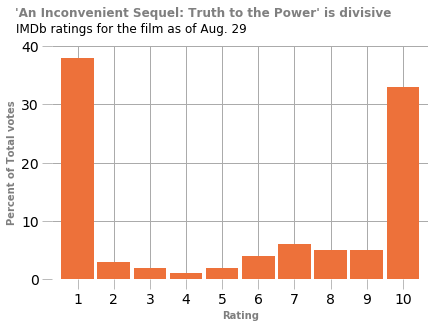

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                 index=range(1,11))

plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = fake.plot.bar(color='#ED713A', width=0.9)

ax.text(x=-1.7, y=42.3, s="IMDb ratings for the film as of Aug. 29", fontsize=12);

fig.patch.set_alpha(0)
ax.patch.set_alpha(0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(color='#ababab')

ax.set_xticklabels(range(1, 11, 1), rotation=0)
ax.set_yticks(range(0, 50, 10))
ax.set_yticklabels(range(0, 50, 10))

ax.tick_params(which='major', length=10, color='#ababab')

plt.xlabel('Rating', fontsize=10, fontweight='bold', alpha=0.5)
plt.ylabel('Percent of Total votes', fontsize=10, fontweight='bold', alpha=0.5)
plt.title("'An Inconvenient Sequel: Truth to the Power' is divisive", fontsize='12', fontweight='bold', alpha=0.5, x=-.1, y=1.1, loc='left')

plt.show()

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [14]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total exports'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds'
))

fig.update_layout(
    title_text = "Side Dishes of America's Regions",
    geo_scope='usa', # limite map scope to USA
)

fig.show()

# STRETCH OPTIONS

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).


### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here